# Structured AntiBody DAtaBase

This Dataset contains antobody strucutres as well as antibody-antigen compexes.

We downloaded only the Complexes with Affinity data (Acess on 30.4.2022)

The data is taken from http://opig.stats.ox.ac.uk/webapps/newsabdab/sabdab/search/?ABtype=All&method=All&species=All&resolution=&rfactor=&antigen=All&ltype=All&constantregion=All&affinity=True&isin_covabdab=All&isin_therasabdab=All&chothiapos=&restype=ALA&field_0=Antigens&keyword_0=#downloads


In [1]:
import pandas as pd
import yaml
import os

In [2]:
from abag_affinity.utils.config import read_config, get_resources_paths

In [4]:
config = read_config("../../abag_affinity/config.yaml")
summary_path, pdb_path = get_resources_paths(config, "SAbDab")

In [6]:
summary_df = pd.read_csv(summary_path, sep="\t")
summary_df

,pdb,Hchain,Lchain,model,antigen_chain,antigen_type,antigen_het_name,antigen_name,short_header,date,...,scfv,engineered,heavy_subclass,light_subclass,light_ctype,affinity,delta_g,affinity_method,temperature,pmid
0,1mhh,D,C,0,NaN,NaN,NaN,NaN,IMMUNE SYSTEM,08/20/02,...,False,False,IGHV9,IGKV8,Kappa,1.000000e-09,-12.278197,Unknown,NaN,TBD
1,1mhh,B,A,0,NaN,NaN,NaN,NaN,IMMUNE SYSTEM,08/20/02,...,False,False,IGHV9,IGKV8,Kappa,1.000000e-09,-12.278197,Unknown,NaN,TBD
2,1mh5,H,L,0,H,Hapten,HAL,N-{[2-({[1-(4-CARBOXYBUTANOYL)AMINO]-2-PHENYLE...,IMMUNE SYSTEM,08/19/02,...,False,True,IGHV1,IGKV2,Kappa,6.100000e-10,-12.571059,Unknown,NaN,TBD
3,1mh5,B,A,0,B,Hapten,HAL,N-{[2-({[1-(4-CARBOXYBUTANOYL)AMINO]-2-PHENYLE...,IMMUNE SYSTEM,08/19/02,...,False,True,IGHV1,IGKV2,Kappa,6.100000e-10,-12.571059,Unknown,NaN,TBD
4,2r56,I,M,0,B,protein,NaN,beta-lactoglobulin,IMMUNE SYSTEM,09/03/07,...,False,False,IGHV3,IGKV1,Kappa,1.300000e-09,-12.120000,SPR,NaN,17997967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1321,6azl,D,C,0,NaN,NaN,NaN,NaN,IMMUNE SYSTEM,09/11/17,...,False,True,IGHV2,IGKV5,Kappa,1.180000e-05,-6.723156,Unknown,NaN,TBD
1322,4d9q,H,L,0,A,protein,NaN,factor d,HYDROLASE/IMMUNE SYSTEM,01/11/12,...,False,True,IGHV7,IGKV1,Kappa,3.000000e-11,-14.355775,SPR,NaN,TBD
1323,4d9q,E,D,0,B,protein,NaN,factor d,HYDROLASE/IMMUNE SYSTEM,01/11/12,...,False,True,IGHV7,IGKV1,Kappa,3.000000e-11,-14.355775,SPR,NaN,TBD
1324,6azk,B,A,0,NaN,NaN,NaN,NaN,IMMUNE SYSTEM,09/11/17,...,False,True,IGHV2,IGKV5,Kappa,2.300000e-06,-7.691979,Unknown,NaN,TBD


In [7]:
summary_df.columns

Index(['pdb', 'Hchain', 'Lchain', 'model', 'antigen_chain', 'antigen_type',
       'antigen_het_name', 'antigen_name', 'short_header', 'date', 'compound',
       'organism', 'heavy_species', 'light_species', 'antigen_species',
       'authors', 'resolution', 'method', 'r_free', 'r_factor', 'scfv',
       'engineered', 'heavy_subclass', 'light_subclass', 'light_ctype',
       'affinity', 'delta_g', 'affinity_method', 'temperature', 'pmid'],
      dtype='object')

In [8]:
summary_df.describe()

,model,resolution,affinity,delta_g
count,1326.0,1326.000000,1.326000e+03,1289.000000
mean,0.0,2.558300,2.324213e-06,-11.034606
std,0.0,0.650745,1.685510e-05,2.098564
min,0.0,1.000000,4.000000e-13,-16.913816
25%,0.0,2.118000,1.000000e-09,-12.340621
50%,0.0,2.501500,8.365000e-09,-11.053614
75%,0.0,2.890000,9.175000e-08,-9.690000
max,0.0,6.980000,2.000000e-04,-5.040000


In [9]:
print("Total Number of entries in table", len(summary_df))
print("Number of unique PDB IDs", len(summary_df["pdb"].unique()))

Total Number of entries in table 1326
Number of unique PDB IDs 746


In [10]:
summary_df["antigen_type"].value_counts()

protein                                       796
peptide                                       239
Hapten                                        117
protein | protein                              39
carbohydrate                                   33
nucleic-acid                                   11
protein | peptide                               9
carbohydrate | protein                          1
carbohydrate | protein | protein                1
nucleic-acid | nucleic-acid | nucleic-acid      1
peptide | peptide | peptide                     1
Name: antigen_type, dtype: int64

## Comparison bewtween Affinity (Kd) and Delta G

<AxesSubplot:xlabel='affinity', ylabel='delta_g'>

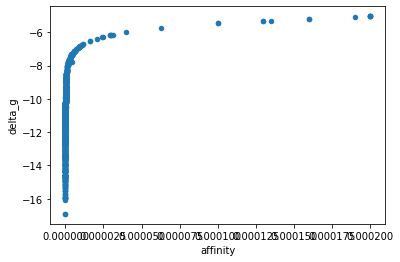

In [11]:
summary_df.plot.scatter("affinity", "delta_g")

In [12]:
summary_df["delta_g"].corr(summary_df["affinity"])

0.3446098200728415

### Sequence Identity Check

Check if two or more sequences are completly identical in PDB File: example 2R56

In [13]:
from abag_affinity.utils.pdb_reader import read_file
from Bio.SeqUtils import seq1

row = summary_df.iloc[4]
path = os.path.join(pdb_path, row["pdb"] + ".pdb")

#path = "../../data/test/1mhh.pdb"
print("Getting Strcuture for {}".format(row["pdb"]))

structure, header= read_file(row["pdb"], path)
model = structure[0]

Getting Strcuture for 2r56


/home/fabian/miniconda3/envs/ag_binding_affinity/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9734.
  PDBConstructionWarning,
/home/fabian/miniconda3/envs/ag_binding_affinity/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9769.
  PDBConstructionWarning,


In [14]:
all_chains = list(structure.get_chains())
for i, chain in enumerate(all_chains):
    chain_seq = seq1(''.join(residue.resname for residue in chain))
    for o_chain in all_chains[i + 1:]:
        if chain_seq == seq1(''.join(residue.resname for residue in o_chain)):
            print(chain.id, o_chain.id)

A B
L M
H I
